In [134]:
%matplotlib inline

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [136]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data = "Data/mouse_drug_data.csv"
clinical_trial_data = "Data/clinicaltrial_data.csv"

In [137]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data)
clinical_data = pd.read_csv(clinical_trial_data) 
clinical_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
5,h246,0,45.000000,0
6,p189,0,45.000000,0
7,n923,0,45.000000,0
8,q119,0,45.000000,0
9,f993,0,45.000000,0


In [104]:
# Combine the data into a single dataset
combined_data_df = pd.merge(clinical_data, mouse_data, how='outer', on='Mouse ID')

# Reduce data to look at effects of Capomulin, Infubinol, Ketapril, and Placebo
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
reduced_data_df = combined_data_df.loc[combined_data_df['Drug'].isin(drugs)]
reduced_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [138]:
# Group by Drug and Timepoint columns and 
#Calculate the mean for each Tumor Volume Data in group
tumor_mean = reduced_data_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)

# Preview DataFrame
tumor_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082

In [139]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = reduced_data_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_error_df = pd.DataFrame(tumor_error)
# Preview DataFrame
tumor_error_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
Ketapril  0                    0.000000
          5                    0.264819
          10                   0.357421
          15                   0.580268
          20                   0.726484
          25                   0.755413
          30                   0.934121
          35                   1.127867
          40                   1.158449
          45                   1.453186
Placebo   0                    0.000000
          5                    0.218091
          10                   0.402064
          15                   0.614461
          20                   0.839609
          25                   1.034872
          30                   1.218231
          35                   1.287481
          40                   1.370634
          45                   1.351726

In [108]:
# Re-Format the Data Frames, index by timepoint, columns by drug name and tumor mean and error values by df
mean_reformat = tumor_mean_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

error_reformat = tumor_error_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


# Preview data sets
mean_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


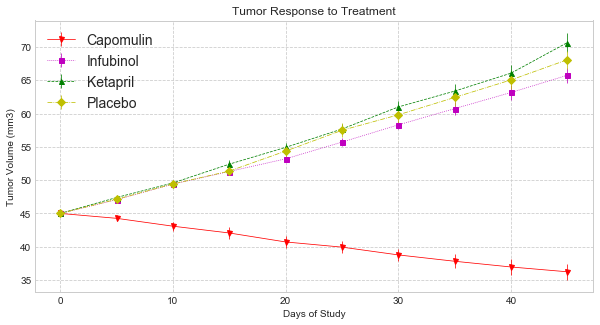

In [155]:
#Set up splatterplot
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(10,5))

# plt treatment by days(use index which is timepoint)

plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"],\
             color="r", marker="v", markersize=5, linestyle="solid", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],\
             color="m", marker="s", markersize=5, linestyle="dotted", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"], yerr=error_pivot["Ketapril"],\
             color="g", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(mean_pivot.index, mean_pivot["Placebo"], yerr=error_pivot["Placebo"],\
             color="y", marker="D", markersize=5, linestyle="dashdot", linewidth=0.75)


# Set x and y axis labels and title of the chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Days of Study") 
plt.ylabel("Tumor Volume (mm3)") 

# Place dashed grid and legend in best location
plt.grid(linestyle="dashed")
plt.legend(drugs, loc='best', fontsize=14, fancybox=True)

# Show the plot
plt.show()

In [147]:
# Store the Mean Meta Site Data Grouped by Drug and Timepoint 
meta_mean = reduced_data_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)

# Preview DataFrame
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [149]:
# Store the Standard Error of Metastatic sites Grouped by Drug and Timepoint
meta_error = reduced_data_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
meta_error_df = pd.DataFrame(meta_error)
# Preview DataFrame
meta_error_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
Ketapril  0                  0.000000
          5                  0.098100
          10                 0.142018
          15                 0.191381
          20                 0.236680
          25                 0.288275
          30                 0.347467
          35                 0.361418
          40                 0.315725
          45                 0.278722
Placebo   0                  0.000000
          5                  0.100947
          10                 0.115261
          15                 0.190221
          20                 0.234064
          25                 0.263888
          30                 0.300264
          35                 0.341412
          40                 0.297294
          45                 0.304240

In [151]:
# Re-Format the Data Frames, index by timepoint, columns by drug name and tumor mean and error values by df
meta_reformat = meta_mean_df.reset_index()
meta_pivot = meta_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

meta_error_reformat = meta_error_df.reset_index()
meta_error_pivot = meta_error_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview data sets
meta_error_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


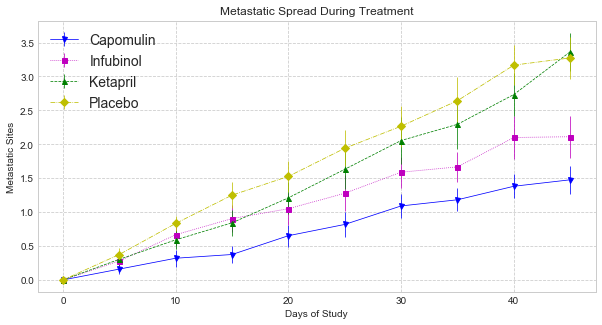

In [156]:
#Set up splatterplot
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(10,5))

# plt treatment by days(use index which is timepoint)

plt.errorbar(meta_pivot.index, meta_pivot["Capomulin"], yerr=meta_error_pivot["Capomulin"],\
             color="b", marker="v", markersize=5, linestyle="solid", linewidth=0.75)
plt.errorbar(meta_pivot.index, meta_pivot["Infubinol"], yerr=meta_error_pivot["Infubinol"],\
             color="m", marker="s", markersize=5, linestyle="dotted", linewidth=0.75)
plt.errorbar(meta_pivot.index, meta_pivot["Ketapril"], yerr=meta_error_pivot["Ketapril"],\
             color="g", marker="^", markersize=5, linestyle="dashed", linewidth=0.75)
plt.errorbar(meta_pivot.index, meta_pivot["Placebo"], yerr=meta_error_pivot["Placebo"],\
             color="y", marker="D", markersize=5, linestyle="dashdot", linewidth=0.75)


# Set x and y axis labels and title of the chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Days of Study") 
plt.ylabel("Metastatic Sites") 

# Place dashed grid and legend in best location
plt.grid(linestyle="dashed")
plt.legend(drugs, loc='best', fontsize=14, fancybox=True)

# Show the plot
plt.show()